# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import io


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_of_cities = len(cities)
len(cities)
no_of_cities

633

In [3]:
city_dictionary ={
    "city": cities,
    "latitude": "",
    "humidity": "",
    "cloudiness": "",
    "windspeed":"",
    "temperature": ""
                 }    

new_cities_df = pd.DataFrame(city_dictionary)

new_cities_df.head()


,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,,,,,
1,hasaki,,,,,
2,bandarbeyla,,,,,
3,olhao,,,,,
4,mataura,,,,,


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
 
call_url = f"{base_url}appid={weather_api_key}&q="    

# Use iterrows to iterate through pandas dataframe
for index, row in new_cities_df.iterrows():
 
    # Get city from df
    city = row['city']
   
    
    # Make API Call
   
    print(f"Retrieving Results for OpenWeather City Weather {index}.")
    response = requests.get(call_url + city).json()
    time.sleep(.15)
    
    # Get Results
    results = response['cod']
    
    try:
        print(f"City found is " + city + " with ID: " , response['id'] ) 
        
        new_cities_df.loc[index, 'latitude'] = response['coord']['lat']
        new_cities_df.loc[index, 'humidity'] = response['main']['humidity']
        new_cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        new_cities_df.loc[index, 'windspeed'] = response['wind']['speed']
        new_cities_df.loc[index, 'temperature'] = response['main']['temp']
        
        
    except (KeyError, IndexError):
        print("City weather not available")
        
    print("------------")    
    
    
    

Retrieving Results for OpenWeather City Weather 0.
City found is kapaa with ID:  5848280
------------
Retrieving Results for OpenWeather City Weather 1.
City found is hasaki with ID:  2112802
------------
Retrieving Results for OpenWeather City Weather 2.
City found is bandarbeyla with ID:  64814
------------
Retrieving Results for OpenWeather City Weather 3.
City found is olhao with ID:  2265447
------------
Retrieving Results for OpenWeather City Weather 4.
City found is mataura with ID:  6201424
------------
Retrieving Results for OpenWeather City Weather 5.
City found is chuy with ID:  3443061
------------
Retrieving Results for OpenWeather City Weather 6.
City found is narsaq with ID:  3421719
------------
Retrieving Results for OpenWeather City Weather 7.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 8.
City found is faanui with ID:  4034551
------------
Retrieving Results for OpenWeather City Weather 9.
City found is ust-nera with ID:  2

City found is bairiki with ID:  7601762
------------
Retrieving Results for OpenWeather City Weather 79.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 80.
City found is tsabong with ID:  932987
------------
Retrieving Results for OpenWeather City Weather 81.
City found is namibe with ID:  3347019
------------
Retrieving Results for OpenWeather City Weather 82.
City found is severomuysk with ID:  2016907
------------
Retrieving Results for OpenWeather City Weather 83.
City found is hofn with ID:  2630299
------------
Retrieving Results for OpenWeather City Weather 84.
City found is horizonte with ID:  3398450
------------
Retrieving Results for OpenWeather City Weather 85.
City found is quatre cocos with ID:  1106643
------------
Retrieving Results for OpenWeather City Weather 86.
City found is albino with ID:  6540342
------------
Retrieving Results for OpenWeather City Weather 87.
City found is hobart with ID:  2163355
------------
Retrieving 

City found is makakilo city with ID:  5850554
------------
Retrieving Results for OpenWeather City Weather 157.
City found is bredasdorp with ID:  1015776
------------
Retrieving Results for OpenWeather City Weather 158.
City found is russell with ID:  4047434
------------
Retrieving Results for OpenWeather City Weather 159.
City found is chipinge with ID:  893549
------------
Retrieving Results for OpenWeather City Weather 160.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 161.
City found is hami with ID:  1529484
------------
Retrieving Results for OpenWeather City Weather 162.
City found is virden with ID:  4252060
------------
Retrieving Results for OpenWeather City Weather 163.
City found is dudinka with ID:  1507116
------------
Retrieving Results for OpenWeather City Weather 164.
City found is lensk with ID:  2020838
------------
Retrieving Results for OpenWeather City Weather 165.
City weather not available
------------
Retrieving Resul

City found is jieshi with ID:  1805857
------------
Retrieving Results for OpenWeather City Weather 235.
City found is inongo with ID:  2315417
------------
Retrieving Results for OpenWeather City Weather 236.
City found is sao joao da barra with ID:  3448903
------------
Retrieving Results for OpenWeather City Weather 237.
City found is bundaberg with ID:  2173323
------------
Retrieving Results for OpenWeather City Weather 238.
City found is tiznit with ID:  2527087
------------
Retrieving Results for OpenWeather City Weather 239.
City found is dikson with ID:  1507390
------------
Retrieving Results for OpenWeather City Weather 240.
City found is fortuna with ID:  5563839
------------
Retrieving Results for OpenWeather City Weather 241.
City found is biak with ID:  1637001
------------
Retrieving Results for OpenWeather City Weather 242.
City found is abyek with ID:  144794
------------
Retrieving Results for OpenWeather City Weather 243.
City found is acapulco with ID:  3533462
---

City found is ribeira grande with ID:  3372707
------------
Retrieving Results for OpenWeather City Weather 314.
City found is wukari with ID:  2318921
------------
Retrieving Results for OpenWeather City Weather 315.
City found is marawi with ID:  1701054
------------
Retrieving Results for OpenWeather City Weather 316.
City found is luderitz with ID:  3355672
------------
Retrieving Results for OpenWeather City Weather 317.
City found is geraldton with ID:  2070998
------------
Retrieving Results for OpenWeather City Weather 318.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 319.
City found is matagami with ID:  6067747
------------
Retrieving Results for OpenWeather City Weather 320.
City found is codrington with ID:  2171099
------------
Retrieving Results for OpenWeather City Weather 321.
City found is tongliao with ID:  2034400
------------
Retrieving Results for OpenWeather City Weather 322.
City found is port lincoln with ID:  2063036
-

City found is simbahan with ID:  1695180
------------
Retrieving Results for OpenWeather City Weather 392.
City found is paramonga with ID:  3933024
------------
Retrieving Results for OpenWeather City Weather 393.
City found is ankang with ID:  1789065
------------
Retrieving Results for OpenWeather City Weather 394.
City found is kupang with ID:  2057087
------------
Retrieving Results for OpenWeather City Weather 395.
City found is saint-georges with ID:  3579925
------------
Retrieving Results for OpenWeather City Weather 396.
City found is inta with ID:  1505579
------------
Retrieving Results for OpenWeather City Weather 397.
City found is del rio with ID:  5520076
------------
Retrieving Results for OpenWeather City Weather 398.
City found is norman wells with ID:  6089245
------------
Retrieving Results for OpenWeather City Weather 399.
City found is volosovo with ID:  472357
------------
Retrieving Results for OpenWeather City Weather 400.
City found is farah with ID:  1142263

City found is ormara with ID:  1168700
------------
Retrieving Results for OpenWeather City Weather 470.
City found is kiunga with ID:  2093846
------------
Retrieving Results for OpenWeather City Weather 471.
City found is tuatapere with ID:  2180815
------------
Retrieving Results for OpenWeather City Weather 472.
City found is mahibadhoo with ID:  1337605
------------
Retrieving Results for OpenWeather City Weather 473.
City found is biltine with ID:  244878
------------
Retrieving Results for OpenWeather City Weather 474.
City found is bonavista with ID:  5905393
------------
Retrieving Results for OpenWeather City Weather 475.
City found is cayenne with ID:  3382160
------------
Retrieving Results for OpenWeather City Weather 476.
City found is banamba with ID:  2460546
------------
Retrieving Results for OpenWeather City Weather 477.
City found is ler with ID:  371466
------------
Retrieving Results for OpenWeather City Weather 478.
City found is kokkola with ID:  651943
--------

City found is peniche with ID:  2264923
------------
Retrieving Results for OpenWeather City Weather 548.
City found is marzuq with ID:  72181
------------
Retrieving Results for OpenWeather City Weather 549.
City found is bela with ID:  1276574
------------
Retrieving Results for OpenWeather City Weather 550.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 551.
City found is ust-ilimsk with ID:  2013952
------------
Retrieving Results for OpenWeather City Weather 552.
City found is ternate with ID:  1624041
------------
Retrieving Results for OpenWeather City Weather 553.
City found is muncar with ID:  1634718
------------
Retrieving Results for OpenWeather City Weather 554.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 555.
City found is felanitx with ID:  2517750
------------
Retrieving Results for OpenWeather City Weather 556.
City found is vanavara with ID:  2013727
------------
Retrieving Results fo

City found is ugep with ID:  2320831
------------
Retrieving Results for OpenWeather City Weather 626.
City found is izmir with ID:  311044
------------
Retrieving Results for OpenWeather City Weather 627.
City found is waingapu with ID:  1622318
------------
Retrieving Results for OpenWeather City Weather 628.
City found is sistranda with ID:  3139597
------------
Retrieving Results for OpenWeather City Weather 629.
City found is tabas with ID:  113659
------------
Retrieving Results for OpenWeather City Weather 630.
City found is jinchang with ID:  1805733
------------
Retrieving Results for OpenWeather City Weather 631.
City found is pangnirtung with ID:  6096551
------------
Retrieving Results for OpenWeather City Weather 632.
City found is erenhot with ID:  2037485
------------


In [5]:
new_cities_df

,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,78,0,6.17,293.69
1,hasaki,35.7333,51,94,6.47,276.37
2,bandarbeyla,9.4942,73,38,7.18,297.63
3,olhao,37.0286,22,0,6.17,292.09
4,mataura,-46.1927,99,48,0.94,288.42
...,...,...,...,...,...,...
628,sistranda,63.7256,63,100,6.37,274.13
629,tabas,33.5959,28,6,1.56,282.34
630,jinchang,38.4953,39,6,1.79,264.48
631,pangnirtung,66.1451,89,97,2.63,243.67


In [6]:
#Removing cities that were not found with 404 Error
nan_value = float("NaN")
new_cities_df.replace("", nan_value, inplace=True)

new_cities_df.dropna(subset = ["latitude"], inplace=True)
new_cities_df

,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,78.0,0.0,6.17,293.69
1,hasaki,35.7333,51.0,94.0,6.47,276.37
2,bandarbeyla,9.4942,73.0,38.0,7.18,297.63
3,olhao,37.0286,22.0,0.0,6.17,292.09
4,mataura,-46.1927,99.0,48.0,0.94,288.42
...,...,...,...,...,...,...
628,sistranda,63.7256,63.0,100.0,6.37,274.13
629,tabas,33.5959,28.0,6.0,1.56,282.34
630,jinchang,38.4953,39.0,6.0,1.79,264.48
631,pangnirtung,66.1451,89.0,97.0,2.63,243.67


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# using the savetxt 
# from the numpy module

np.savetxt("City_Data2.csv", 
               new_cities_df,
               delimiter =", ", 
               encoding='utf-8',     
               fmt ='% s')



PermissionError: [Errno 13] Permission denied: 'City_Data2.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
"Inspected the data and there are no cities with Humidity > 100%"

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

I have some cities where data was not found and some that brought back bad data.  I am removing those here


In [ ]:
#Removing Cities that returned a 404 Error



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

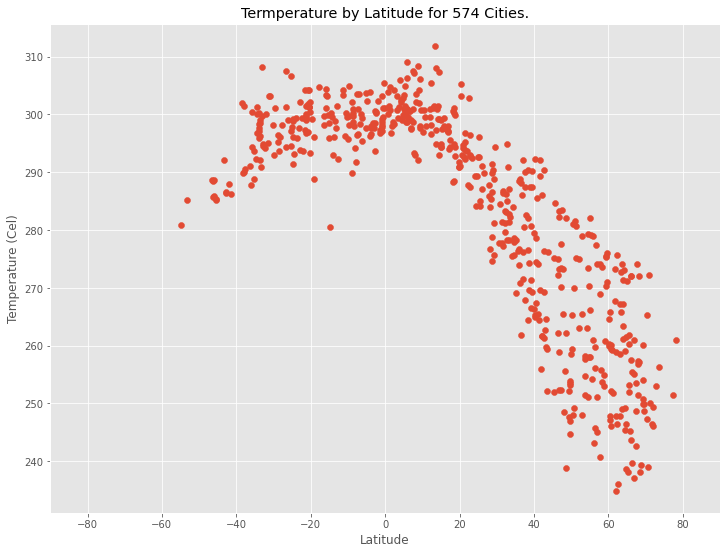

In [8]:
# Usee ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

plt.scatter(new_cities_df["latitude"], new_cities_df["temperature"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (Cel)")
plt.xlim(-90,90)
plt.title(f"Termperature by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Temp_VS_Lat.png")
#plt.show()

## Latitude vs. Humidity Plot

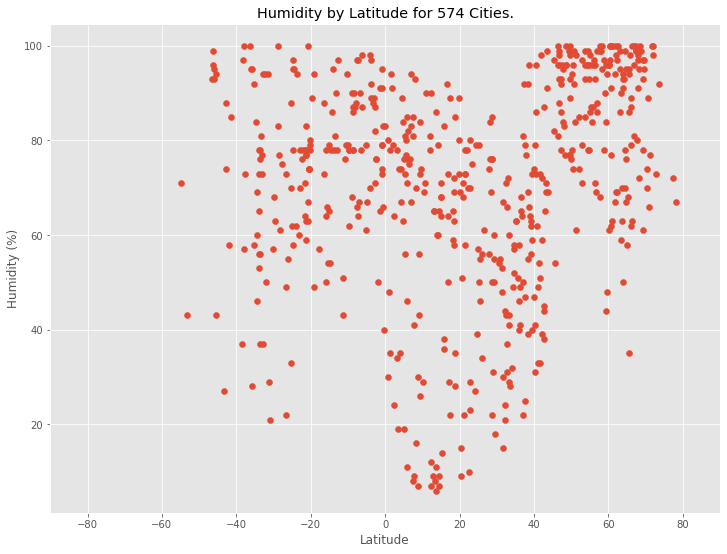

In [9]:
# Usee ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

plt.scatter(new_cities_df["latitude"], new_cities_df["humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.title(f"Humidity by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")
#plt.show()



## Latitude vs. Cloudiness Plot

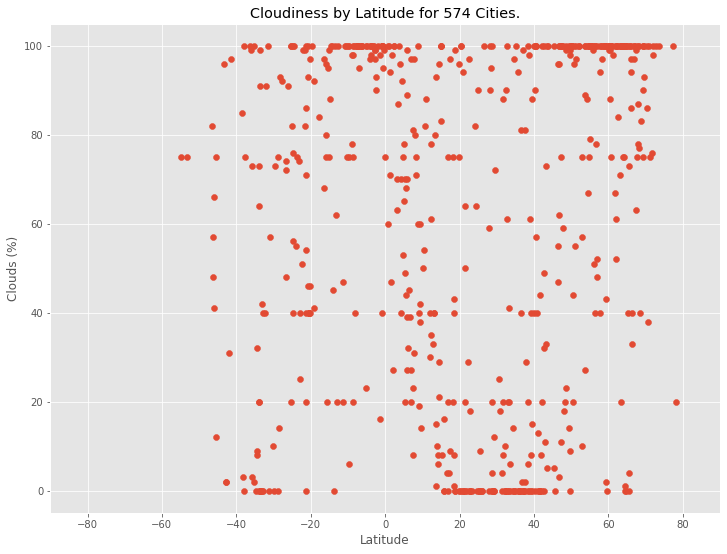

In [10]:
# Usee ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

plt.scatter(new_cities_df["latitude"], new_cities_df["cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.xlim(-90,90)
plt.title(f"Humidity by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")
#plt.show()

## Latitude vs. Wind Speed Plot

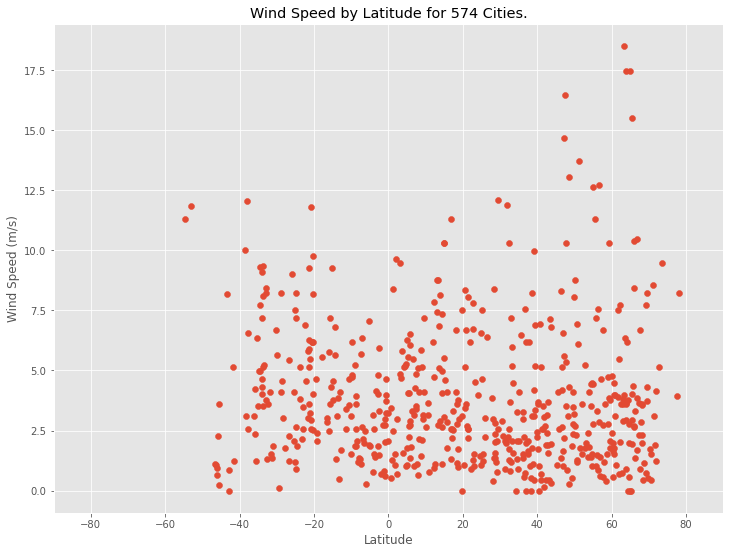

In [24]:
# Usee ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

plt.scatter(new_cities_df["latitude"], new_cities_df["windspeed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-90,90)
plt.title(f"Wind Speed by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")
#plt.show()

## Linear Regression

In [23]:
# Generate North/South Hemi DF

# Southern cities

south_cities = new_cities_df.loc[new_cities_df["latitude"] <= 0]
south_cities_ct = len(south_cities)


# Northern cities

north_cities = new_cities_df.loc[new_cities_df["latitude"] > 0]
north_cities_ct = len(north_cities)

#north_cities
north_cities
#print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
#     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))



,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,78.0,0.0,6.17,293.69
1,hasaki,35.7333,51.0,94.0,6.47,276.37
2,bandarbeyla,9.4942,73.0,38.0,7.18,297.63
3,olhao,37.0286,22.0,0.0,6.17,292.09
6,narsaq,60.9167,63.0,100.0,3.97,259.27
...,...,...,...,...,...,...
628,sistranda,63.7256,63.0,100.0,6.37,274.13
629,tabas,33.5959,28.0,6.0,1.56,282.34
630,jinchang,38.4953,39.0,6.0,1.79,264.48
631,pangnirtung,66.1451,89.0,97.0,2.63,243.67


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

st.pearsonr(ave_cap_mouse['Tumor Volume (mm3)'], ave_cap_mouse['Weight (g)'])

# Print the updated Scatter plot with Regression Line

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
points_x = ave_cap_mouse["Tumor Volume (mm3)"].tolist()
points_y = ave_cap_mouse["Timepoint"].tolist()

def weather_lin_regress(df, x, y):

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.title("Capomulin Mouse - Ave Tumor Volume / Weight")
    plt.title(label=f"  Speed by Latitude for {len(new_cities_df)} Cities.")
 
    plt.xlabel("Weight)")
    plt.ylabel("Average Tumor Volume (mm3)")
 
    plt.show()




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:


 X = ave_cap_mouse.iloc[:,3].values.reshape(-1, 1)  # values converts it into a numpy array
 Y = ave_cap_mouse.iloc[:,1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression